## 反強磁性体への強い磁場の効果

全エネルギー：$E$  
磁化の大きさ：$M$  
磁場：$B$  
$M_+$と磁場がなす角度：$\theta$  
$M_-$と磁場がなす角度：$\phi$  
交換結合定数：$A$

全エネルギー$E$は、それぞれの副格子のゼーマン項と交換項の和で、2副格子のモーメントの相対方向に依存すると仮定すると

　　$E = -MB \cos\theta -MB \cos\phi + AM^2\cos (\theta+\phi)$

と書ける。  
モデルに異方性を組み込むため、  

　　$-\frac{1}{2}\Delta (\cos^2\theta + \cos^2\phi)$

を加える（$\Delta$は小さな定数）。  
$\theta$と$\phi$が0またはπをとりやすいということを考慮するための項。

反強磁性（$\theta = 0$、$\phi = \pi$）で固定すると、

　　$E = -AM^2-\Delta$

となる、エネルギーは磁場に依存しない。

スピンフロップすることにより（$\theta = \phi$）、全エネルギー$E$は、

　　$E = -2MB \cos\theta + AM^2\cos 2\theta - \Delta\cos^2\theta$

となる。  
異方性を無視すれば、条件 $\partial E/\partial\theta = 0$ より、$\theta = \cos^{-1}(B/2AM)$ のときエンルギーが最小となる。

これらを考慮して、全エネルギーや磁場とモーメントの角度、全磁化$M_{total}$の磁場$B$依存性を計算した結果が以下になる。

In [1]:
using Plots
gr()

Plots.GRBackend()

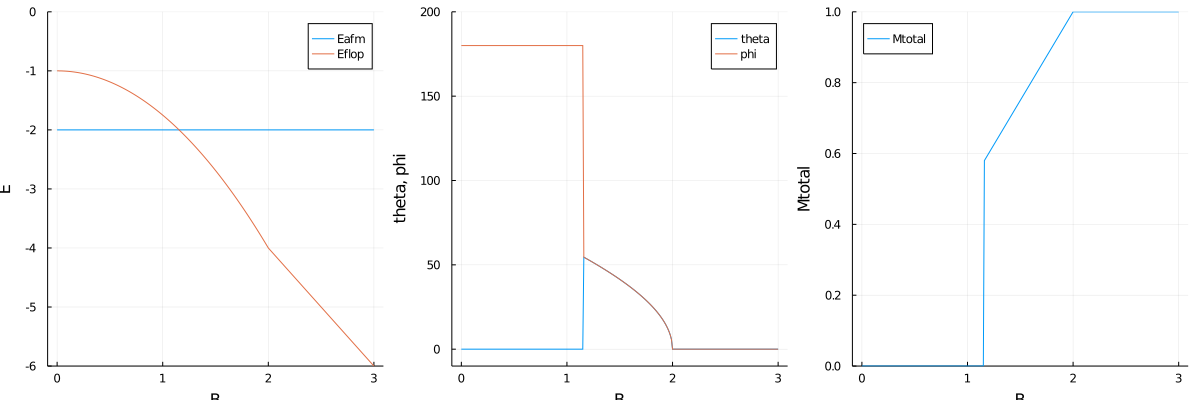

In [2]:
M = 1; #磁化の大きさ
A = 1; #交換項
Δ = 1; #異方性の大きさ（μBのオーダー）

B = collect(0:0.01:3); #磁場
θafm = @. 0.0 + (B*0.0); #AFM状態でのθのarray
φafm = @. π + (B*0.0); #AFM状態でのφのarray
Eafm = @. (-A*M^2 - Δ)+(B*0.0); #AFM状態のエネルギー

para = @. B/(2*A*M); #交換結合に関するパラメータ
para = @. para*(para <= 1) + 1*(para > 1) #交換結合に関するパラメータ
θflop = @. acos(para); #スピンフロップしたときの角度θ
Eflop = @. -2*M*B*cos(θflop) + A*M^2*cos(2*θflop) - Δ*cos(θflop)^2; #スピンフロップ状態のエネルギー

θval = @. (θafm*(Eflop >= Eafm) + θflop*(Eafm > Eflop))/π*180.0; #θの磁場依存性（エネルギーが低い方が採用）
φval = @. (φafm*(Eflop >= Eafm) + θflop*(Eafm > Eflop))/π*180.0; #φの磁場依存性（エネルギーが低い方が採用）
Mval = @. (cosd(θval) + cosd(φval))/2; #磁化の大きさ

p1 = Plots.plot(B, [Eafm, Eflop], xscale = :identity, yscale = :identity, seriestype=:line,
                ylims=(minimum(Eflop),0), label=["Eafm" "Eflop"], legend=:topright, ylabel="E", xlabel="B")
p2 = Plots.plot(B, [θval, φval], xscale = :identity, yscale = :identity, seriestype=:line, 
                ylims=(-10,200), label=["theta" "phi"], legend=:topright, ylabel="theta, phi", xlabel="B")
p3 = Plots.plot(B, Mval, xscale = :identity, yscale = :identity, seriestype=:line, 
                ylims=(0,1), label="Mtotal", legend=:topleft, ylabel="Mtotal", xlabel="B")
Plots.plot(p1,p2,p3,layout=(1,3),size=(1200,400))